<a href="https://colab.research.google.com/github/esoyeon/TIL/blob/master/0806_NLP_%EC%97%B0%EC%8A%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If the import fails, run this
# !pip install -q tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete841SFN/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete841SFN/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete841SFN/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
train_data, test_data = imdb['train'], imdb['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [8]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]


In [11]:
original_string = tokenizer.decode(tokenized_string)

print('The original string : {}'.format(original_string))

The original string : TensorFlow, from basics to mastery


In [16]:
for ts in tokenized_string:
  print('{} ---> {}'.format(ts, tokenizer.decode([ts])))

6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [24]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [27]:
embedding_dim = 64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid'),
])


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 10
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data = test_dataset) 

Epoch 1/10
391/391 [==============================] - 12s 30ms/step - loss: 0.6788 - accuracy: 0.6212 - val_loss: 0.6426 - val_accuracy: 0.7663
Epoch 2/10
391/391 [==============================] - 11s 29ms/step - loss: 0.5476 - accuracy: 0.7990 - val_loss: 0.4711 - val_accuracy: 0.8358
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.3919 - accuracy: 0.8665 - val_loss: 0.4024 - val_accuracy: 0.8218
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.3144 - accuracy: 0.8889 - val_loss: 0.3361 - val_accuracy: 0.8728
Epoch 5/10
391/391 [==============================] - 12s 29ms/step - loss: 0.2714 - accuracy: 0.9044 - val_loss: 0.3175 - val_accuracy: 0.8777
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2438 - accuracy: 0.9136 - val_loss: 0.3093 - val_accuracy: 0.8793
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2220 - accuracy: 0.9210 - val_loss: 0.3073 - val_accuracy:

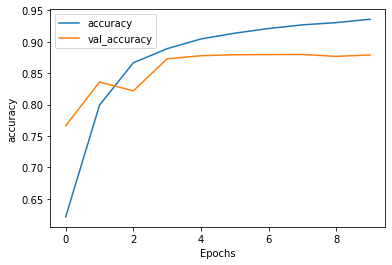

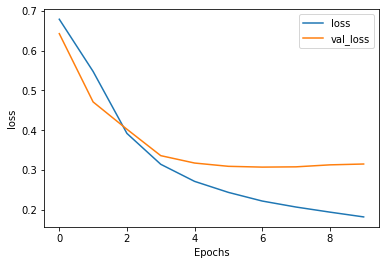

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')